<a href="https://colab.research.google.com/github/Hit07/ML-DL-Torch/blob/main/FoodVisionipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CUSTOM DATASET

> Our dataset is a subset of the Food101 dataset.
Food101 starts 101 different classes of food and 1000 images per class (750
training, 250 testing)

> Our dataset starts with 3 classes of food and only 10% of the images (-75 training,
25 testing)

> Why do this?
When starting out ML projects, it's important to try things on a small scale and then increase the scale when necessary.
The whole point is to speed up how fast you can experiment.

# Import Statements

In [ ]:
import torch
from torch import nn
from pathlib import Path
import requests
import zipfile
import os
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np



# Downloading the datasets

In [ ]:
data_path = Path("data/")
images_path = data_path / 'pizza_steak_sushi'

if images_path.is_dir():
  print(f'{images_path} directory already exists, skipping download')
else:
  print(f"{images_path} directory doesn't exist")
  images_path.mkdir(parents=True,exist_ok=True)

  with open(data_path/'pizza_steak_sushi.zip','wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip')
    request.raise_for_status
    print("Downlaoding the zip file")
    f.write(request.content)

  with zipfile.ZipFile(data_path/'pizza_steak_sushi.zip','r') as zip_f:
    print("Extracting zipfile")
    zip_f.extractall(images_path)


data/pizza_steak_sushi directory already exists, skipping download


In [ ]:
# Data Exploration and Data Cleaning

def walk_through_dir(dir_path):
  ''' Walks through the dir_path and returns the content'''
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f'There are {len(dirnames)} and {len(filenames)} images in {dirpath}')

walk_through_dir(images_path)

There are 2 and 0 images in data/pizza_steak_sushi
There are 3 and 0 images in data/pizza_steak_sushi/train
There are 0 and 78 images in data/pizza_steak_sushi/train/pizza
There are 0 and 72 images in data/pizza_steak_sushi/train/sushi
There are 0 and 75 images in data/pizza_steak_sushi/train/steak
There are 3 and 0 images in data/pizza_steak_sushi/test
There are 0 and 25 images in data/pizza_steak_sushi/test/pizza
There are 0 and 31 images in data/pizza_steak_sushi/test/sushi
There are 0 and 19 images in data/pizza_steak_sushi/test/steak


In [ ]:
train_dir = images_path / 'train'
test_dir = images_path / 'test'

train_dir,test_dir



(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## Visualizing and image
1. Get all of the image paths
2. Pick a random image path using Python's `random.choice()`
3. Get the image class name using `pathlib.Path.parent.stem`
4. Since we're working with images, let's open the image with Python's PIL
5. We'll then show the image and print metadata

In [ ]:
torch.manual_seed(42)
images_list  = list(images_path.glob('*/*/*.jpg'))
random_image = random.choice(images_list)
random_image_class = random_image.parent.stem
img = Image.open(random_image)

print(f'Image Path: {random_image}\nImage class: {random_image_class}\nImage height: { img.height}\nImage width: { img.width}\n')

Image Path: data/pizza_steak_sushi/train/sushi/3353428.jpg
Image class: sushi
Image height: 512
Image width: 512



(-0.5, 511.5, 511.5, -0.5)

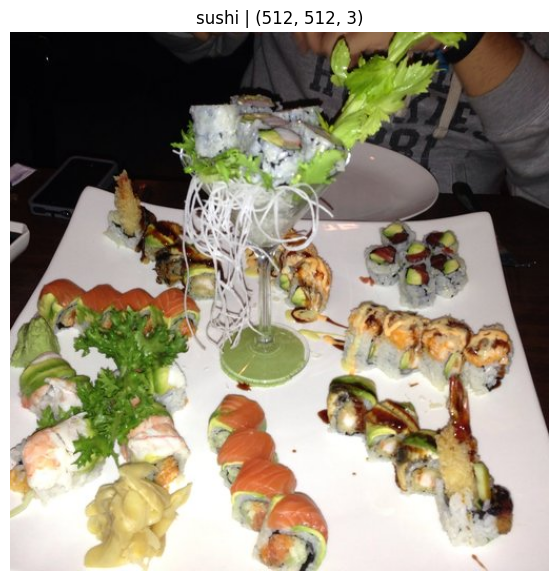

In [ ]:
# Visualize the Data
image_as_np = np.array(img)
plt.figure(figsize=(10,7))
plt.imshow(image_as_np)
plt.title(f'{random_image_class} | {image_as_np.shape}')
plt.axis('off')